In [100]:
import pandas as pd
import numpy as np

from sklearn.ensemble import ExtraTreesRegressor  #for feature importance
from sklearn.model_selection import train_test_split #train test split
from sklearn.ensemble import RandomForestRegressor  #RF model
from sklearn.model_selection import RandomizedSearchCV  # for hyperparameter tuning
from sklearn import metrics   #to evaluate model

import seaborn as sns
import matplotlib.pyplot as plt


import pickle  #to save model

%matplotlib inline

In [2]:
df = pd.read_csv("car data.csv")
print(f"data shape: {df.shape}")
df.head()

data shape: (301, 9)


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
#To check numerical columns
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [4]:
# To check datatypes
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [30]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

As car name wont play much role in prediction of selling price, it is not considered for future analysis

In [5]:
final_dataset = df.drop(columns='Car_Name')
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
#Create new variable, no_years
final_dataset['Current_year'] = 2022
final_dataset['no_years'] = final_dataset['Current_year']-final_dataset['Year']
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year,no_years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022,8
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022,9
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022,5
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022,11
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022,8


In [7]:
#drop year and Current year columns
final_dataset.drop(columns=['Year', 'Current_year'], inplace=True)
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [8]:
#Dummies creation for conversion of categorical to numerical
final_dataset = pd.get_dummies(final_dataset, drop_first=True)

In [9]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1


In [10]:
#find correlation
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
no_years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


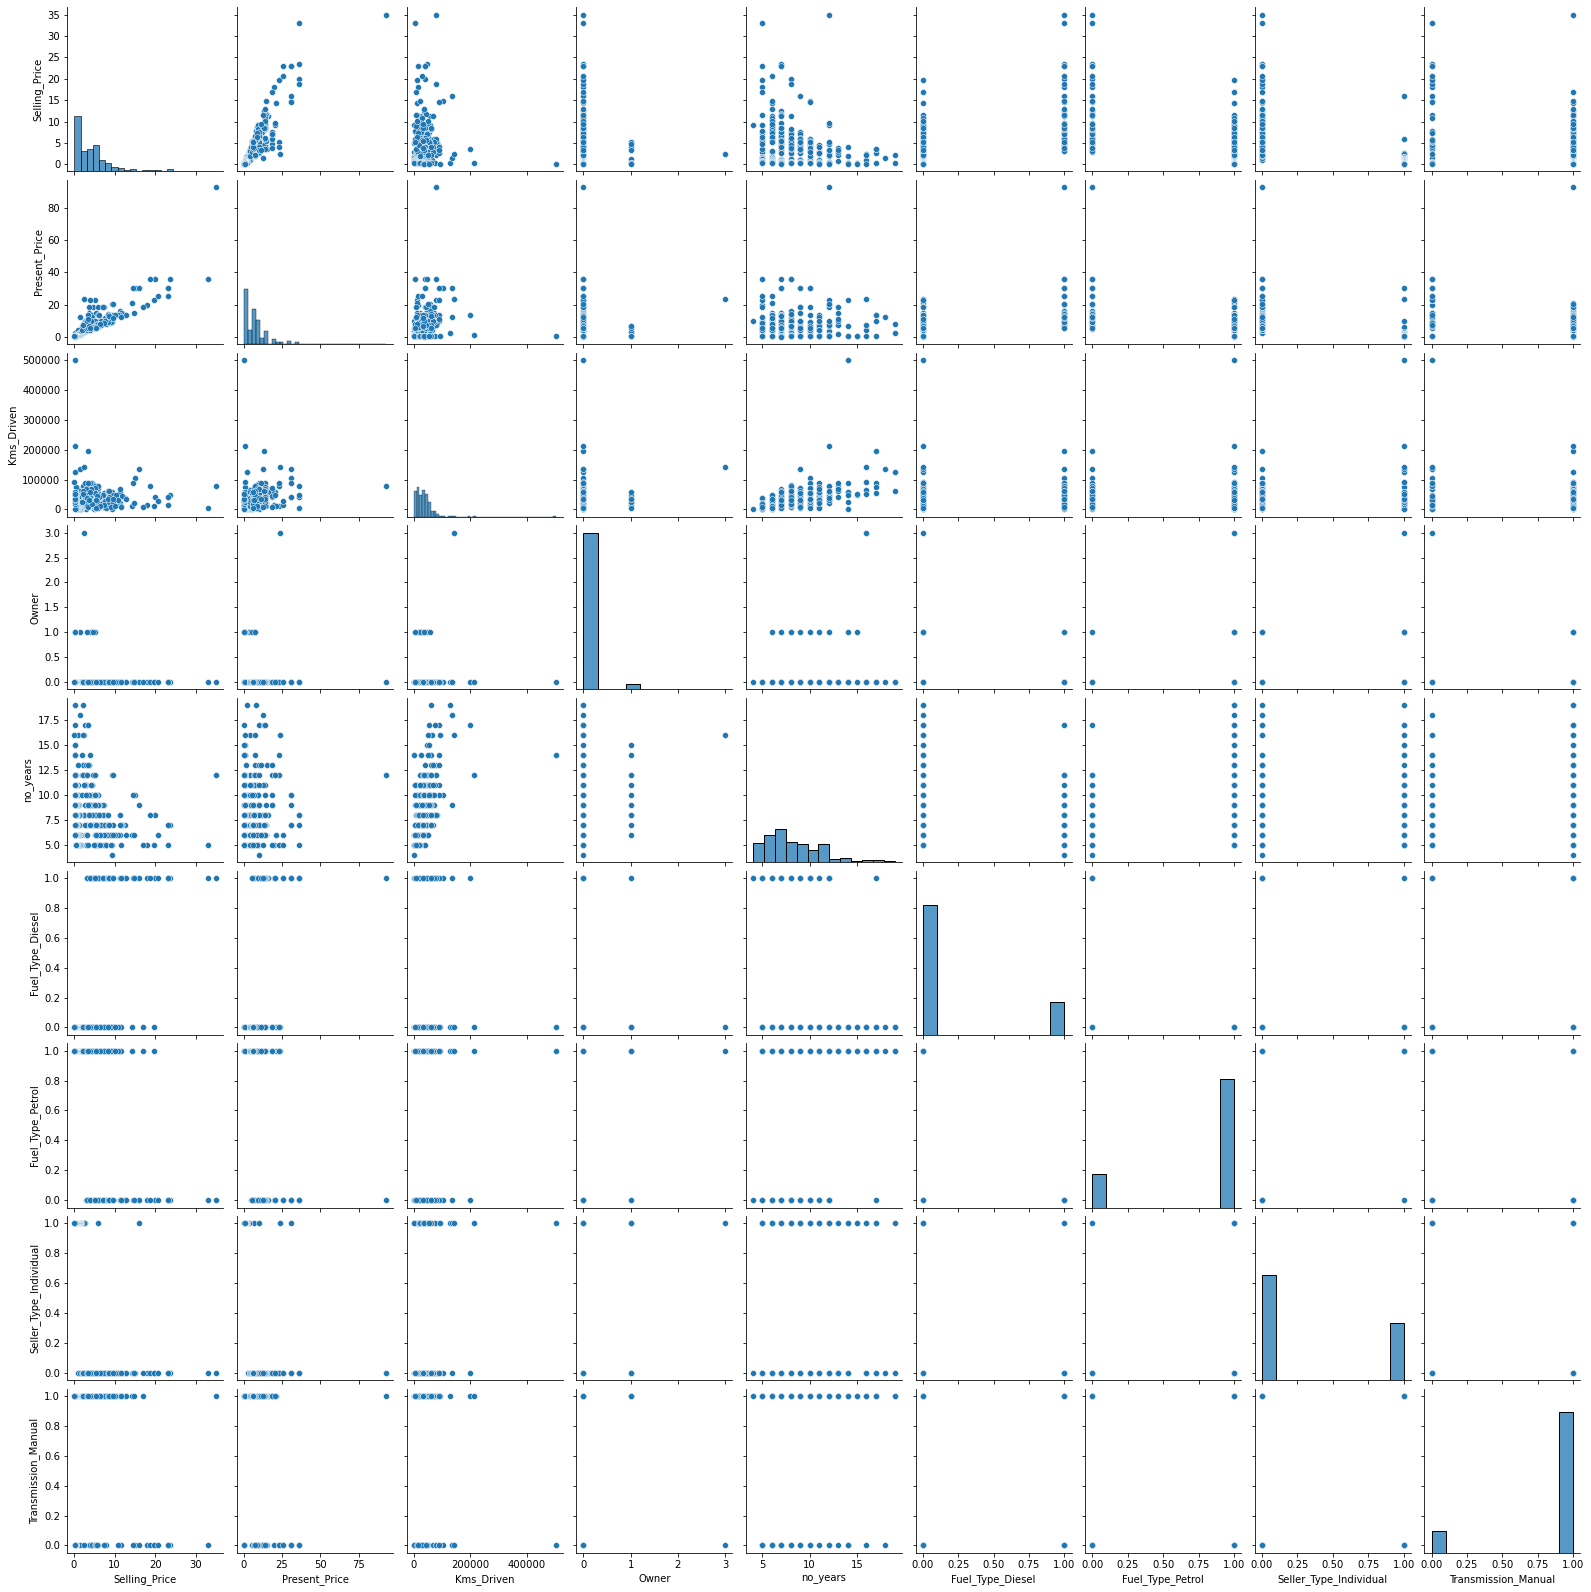

In [11]:
sns.pairplot(final_dataset)

<AxesSubplot:>

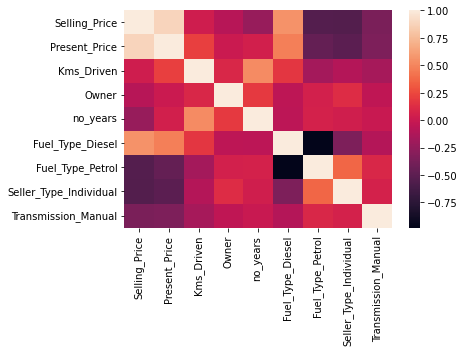

In [12]:
sns.heatmap(final_dataset.corr())

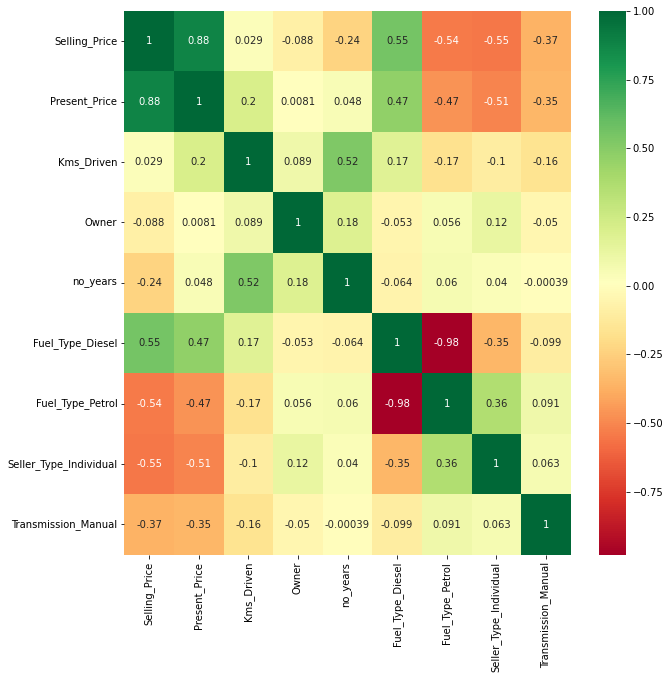

In [20]:
plt.figure(figsize=(10,10))
#plot heat map 
g=sns.heatmap(final_dataset.corr(),annot=True,cmap="RdYlGn")

In [26]:
#First feature is selling price which has to be predicted. We will split data in X, y
X=final_dataset.iloc[:,1:]
y=final_dataset.iloc[:,0]

In [31]:
#Feature importance

model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [35]:
# This will give importance of each independent feature wrt dependent feature y. 
print(X.columns)
feature_importance= model.feature_importances_
print(feature_importance)

Index(['Present_Price', 'Kms_Driven', 'Owner', 'no_years', 'Fuel_Type_Diesel',
       'Fuel_Type_Petrol', 'Seller_Type_Individual', 'Transmission_Manual'],
      dtype='object')
[0.38157808 0.04126215 0.00096416 0.0754125  0.2171106  0.0134203
 0.13473269 0.13551951]


In [36]:
for i in range(len(X.columns)):
    print(X.columns[i], " : ", feature_importance[i] )

Present_Price  :  0.3815780814817061
Kms_Driven  :  0.04126214751784112
Owner  :  0.0009641649084997339
no_years  :  0.07541250172186723
Fuel_Type_Diesel  :  0.21711060209994315
Fuel_Type_Petrol  :  0.013420302512380975
Seller_Type_Individual  :  0.13473269412960032
Transmission_Manual  :  0.13551950562816134


As it can be seen, present price, fuel type diesel, transmission manual have high feature importance

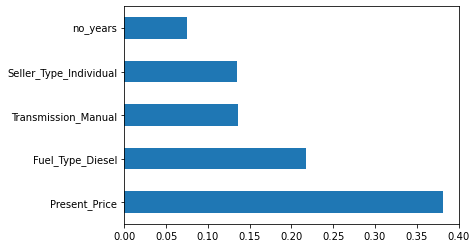

In [46]:
#Plot feature importance graph
feat_impt = pd.Series(model.feature_importances_, index=X.columns)
horizontal_bar=feat_impt.nlargest(5).plot(kind='barh')

In [50]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
print(X_train.shape)

(240, 8)


## ML model

In [70]:
rf_regressor = RandomForestRegressor()

In [67]:
## Hyperparameter tuning

#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 800, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


In [68]:
## To find optimal hyperparameter combination, randomizedsearchCV is used

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 163, 227, 290, 354, 418, 481, 545, 609, 672, 736, 800], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [69]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [71]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

#### Explaination of randomized search CV and the parameters

Below model rf_random model will be fitted to X_train, y_train. For fitting the model, various hyperparameters as mentioned in random_grid will be checked to find optimized set of hyperparameters. 5 fold cross validation is also done at the same time as seen in above cell with argument cv =5.  n_iter=10 specifies that 10 different combinations will be tested. so 10 combinations with 5 fold cross validation means, 50 times model will be fitted. For each combination out of 10 combinations, score will be calculated based on scoring method neg_mean_squared_error. Estimator = rf means, random forest model will be fitted to the data. n_jobs =1 means, only 1 job will be run at the time in CPU so all the cores will be used for this operation. 

In [72]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=609; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=609; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=609; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=609; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=609; total time=   0.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=736; total time=   0.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=736; total time=   0.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 163, 227, 290,
                                                         354, 418, 481, 545,
                                                         609, 672, 736, 800]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

Now, the rf_random model is fitted to the data with optimized hyperparameters. we will use that to predict on the X_test

#### Predictions 

In [74]:
predictions = rf_random.predict(X_test)
predictions

array([ 4.91288825,  3.16047423,  0.45452876,  3.94088419,  2.55881391,
        1.14609756, 18.60039906,  4.76178655,  1.30160815,  8.91266669,
        5.03061351, 20.13807516, 10.55312221, 19.93924219,  0.21372001,
        3.54191923,  0.69347221,  5.03083447,  0.43032777,  1.18309795,
        0.44278777,  3.50553594,  2.56981528,  0.84024625, 10.35672021,
        2.903039  ,  0.24328766,  3.16247692,  4.49605464,  0.45032911,
        4.23682658,  5.4426995 ,  6.5575135 ,  0.69164836,  0.68022194,
        2.50085526,  0.44073422, 10.24296695,  9.9714515 ,  0.45032911,
        9.85059451,  2.78388834,  7.3013482 ,  4.31129147,  1.26997781,
        2.71366802, 10.96660011,  4.49594913,  4.47716104, 20.14882694,
       11.35823238,  0.22686523,  0.21424973,  7.24612327,  5.16572916,
        5.86156142,  3.14890863,  5.26108488,  0.45084389,  4.5554001 ,
        0.46869767])

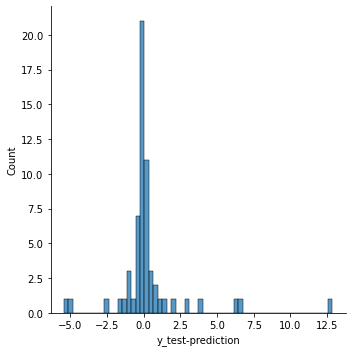

In [95]:
## compare difference between predictions and actual price
sns.displot(y_test-prediction)
plt.xlabel("y_test-prediction")
plt.show()

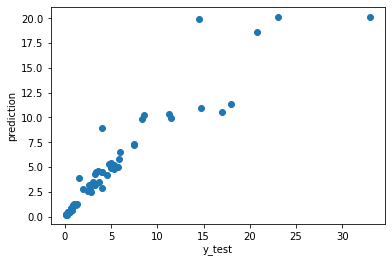

<Figure size 720x720 with 0 Axes>

In [87]:
scatter_plot=plt.scatter(y_test, prediction)
plt.xlabel("y_test")
plt.ylabel("prediction")
plt.figure(figsize=(10,10))
plt.show()

In [99]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.0889439031904942
MSE: 5.802292049054406
RMSE: 2.408794729538905


From scatter plot and distribution plot, it seems that difference between actual and predicted selling price is very low in most of the cases. So we will use this model for deployment purpose.

## Pickle the model for deployment

In [102]:
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)